In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dog-and-cat-classification-dataset


In [1]:
from pathlib import Path
url = Path('/kaggle/input/dog-and-cat-classification-dataset/PetImages')
input_path=[]
label=[]
for types in url.iterdir():
  for files in types.iterdir():
    if types.name == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(str(files))

In [2]:
len(input_path)

24998

In [3]:
len(label)

24998

In [4]:
import pandas as pd
df = pd.DataFrame({'Image':input_path,'Label':label})
df.head()

,Image,Label
0,/kaggle/input/dog-and-cat-classification-datas...,1
1,/kaggle/input/dog-and-cat-classification-datas...,1
2,/kaggle/input/dog-and-cat-classification-datas...,1
3,/kaggle/input/dog-and-cat-classification-datas...,1
4,/kaggle/input/dog-and-cat-classification-datas...,1


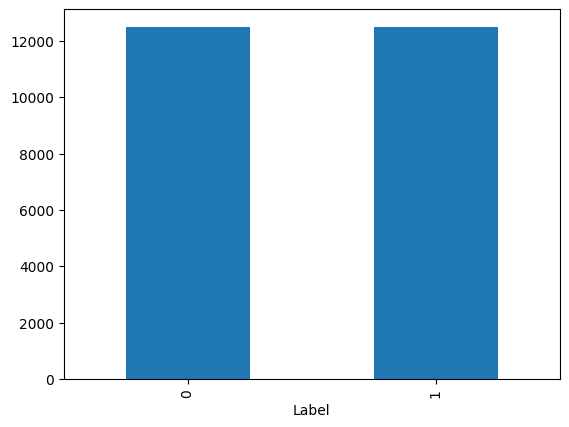

In [ ]:
import matplotlib.pyplot as plt
df.value_counts('Label').plot(kind='bar')
df['Label'] = df['Label'].astype(str)
plt.show()

In [ ]:
import random
from tensorflow.keras.utils import load_img
temp=df[df['Label']==0]['Image']

if len(temp) >= 10:
  start = random.randint(0,len(temp)-10)
  files = temp.iloc[start:start+10]
  plt.figure(figsize=(10,10))

  for index,file in enumerate(files):
    plt.subplot(2, 5, index+1)
    img = load_img(str(file))
    plt.imshow(img)
    plt.title('Cat')
    plt.axis('off')

  plt.tight_layout()
  plt.show()

else:
  print('เอ๋อเเดก')

เอ๋อเเดก


In [5]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [6]:
IMAGE_WIDTH = 128
IMAGE_HIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HIGHT)
IMAGE_CHANEL = 3
FAST_RUN = False
batch_size=128

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_generator = ImageDataGenerator(
    rescale=1.0/255
)

In [9]:
print(train['Label'].apply(type).value_counts())

Label
<class 'int'>    19998
Name: count, dtype: int64


In [10]:
train['Label'] = train['Label'].astype(str)
test['Label'] = test['Label'].astype(str)
train_iter = train_generator.flow_from_dataframe(
    train,
    x_col = 'Image',
    y_col = 'Label',
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'binary'
)
val_iter = val_generator.flow_from_dataframe(
    test,
    x_col = 'Image',
    y_col = 'Label',
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


157

In [ ]:
import keras
print(keras.__version__)

3.8.0


In [20]:
from keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(IMAGE_WIDTH,
                                                                                                    IMAGE_HIGHT,
                                                                                                    IMAGE_CHANEL)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,273 (49.37 MB)

 Trainable params: 12,940,801 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [13]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',             # path ที่จะเซฟไฟล์ไว้
    monitor='val_accuracy',          # เช็คจากอะไร ('val_accuracy' ก็ได้)
    save_best_only=True,         # เซฟเฉพาะตอนที่โมเดลดีขึ้น
    save_weights_only=False,     # เซฟทั้งโมเดล (True ถ้าอยากเซฟแค่น้ำหนัก)
    verbose=1
)

In [14]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
Early = EarlyStopping(patience = 5)
ReduceLR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2,
    verbose = 1,
    factor = 0.5,
    min_lr = 0.00001
)
callback = [Early,ReduceLR,checkpoint]

In [21]:
print(K.get_value(model.optimizer.learning_rate))


0.0005


In [ ]:

history = model.fit(
    train_iter,
    epochs=15,
    callbacks=callback,
    validation_data=val_iter#ตอนฝึกก็วัดผลกับข้อมูลนี้ เพื่อเช็ค
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
101/157 ━━━━━━━━━━━━━━━━━━━━ 7:51 8s/step - accuracy: 0.5974 - loss: 2.1407

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6102 - loss: 2.0561
Epoch 1: val_accuracy improved from -inf to 0.50980, saving model to best_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 1405s 9s/step - accuracy: 0.6104 - loss: 2.0548 - val_accuracy: 0.5098 - val_loss: 1.8535 - learning_rate: 5.0000e-04
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6902 - loss: 1.5241
Epoch 2: val_accuracy did not improve from 0.50980
157/157 ━━━━━━━━━━━━━━━━━━━━ 1400s 9s/step - accuracy: 0.6903 - loss: 1.5237 - val_accuracy: 0.5096 - val_loss: 2.8062 - learning_rate: 5.0000e-04
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7247 - loss: 1.2433
Epoch 3: val_accuracy improved from 0.50980 to 0.65640, saving model to best_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 1388s 9s/step - accuracy: 0.7248 - loss: 1.2430 - val_accuracy: 0.6564 - val_loss: 1.2794 - learning_rate: 5.0000e-04
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7540 - loss: 1.0422
Epoch 4: val_accuracy did not improve from 0.65640
157/157 ━━━━━━━━━━━━━━━━━━━━ 1387s 9s/step - accuracy: 0.7540 - loss: 1.0420 - val_accuracy: 0.6472 - val_loss: 1.2417 - learning_rate: 5.0000e-04
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7679 - loss: 0.9182
Epoch 5: val_accuracy improved from 0.65640 to 0.70920, saving model to best_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 1404s 9s/step - accuracy: 0.7679 - loss: 0.9183 - val_accuracy: 0.7092 - val_loss: 1.0853 - learning_rate: 5.0000e-04
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7665 - loss: 0.9142
Epoch 6: val_accuracy improved from 0.70920 to 0.78620, saving model to best_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 1386s 9s/step - accuracy: 0.7666 - loss: 0.9140 - val_accuracy: 0.7862 - val_loss: 0.9275 - learning_rate: 5.0000e-04
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7906 - loss: 0.8277
Epoch 7: val_accuracy did not improve from 0.78620
157/157 ━━━━━━━━━━━━━━━━━━━━ 1380s 9s/step - accuracy: 0.7906 - loss: 0.8275 - val_accuracy: 0.7218 - val_loss: 0.9976 - learning_rate: 5.0000e-04
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8019 - loss: 0.7719
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 8: val_accuracy did not improve from 0.78620
157/157 ━━━━━━━━━━━━━━━━━━━━ 1378s 9s/step - accuracy: 0.8019 - loss: 0.7719 - val_accuracy: 0.7318 - val_loss: 1.0882 - learning_rate: 5.0000e-04
Epoch 9/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8118 - loss: 0.7198
Epoch 9: val_accuracy did not improve from 0.78620
157/157 ━━━━━━━━━━━━━━━━━━━━ 1402s 9s/step - accuracy: 0.8119 - loss: 0.71

157/157 ━━━━━━━━━━━━━━━━━━━━ 1387s 9s/step - accuracy: 0.8438 - loss: 0.5998 - val_accuracy: 0.8120 - val_loss: 0.7795 - learning_rate: 1.2500e-04
Epoch 13/15
 89/157 ━━━━━━━━━━━━━━━━━━━━ 9:37 8s/step - accuracy: 0.8524 - loss: 0.5802

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

In [ ]:
from google.colab import files
x=files.upload()

Saving q0tstg.jpg to q0tstg.jpg


In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Load the image
img = load_img('godgi.jpg', target_size=IMAGE_SIZE)

# Convert the image to a numpy array and normalize it
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize like the training data

# Make a prediction
prediction = model.predict(img_array)

# Interpret the prediction
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

NameError: name 'IMAGE_SIZE' is not defined